<a href="https://colab.research.google.com/github/bharath2005r/Fraud-Transaction-Detection/blob/main/fraud_transaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Models Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path="/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv"
data = pd.read_csv(path, encoding='latin-1')

In [ ]:
data.shape

(69858, 11)

In [ ]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [ ]:
data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
69848,9,PAYMENT,6378.70,C2106567020,0.0,0.0,M648741478,0.0,0.0,0.0,0.0
69849,9,PAYMENT,4936.84,C820787174,0.0,0.0,M2117643804,0.0,0.0,0.0,0.0
69850,9,PAYMENT,11360.16,C2122103934,0.0,0.0,M12204517,0.0,0.0,0.0,0.0
69851,9,PAYMENT,705.76,C1362652435,0.0,0.0,M1783329126,0.0,0.0,0.0,0.0
69852,9,PAYMENT,31125.16,C1901051677,0.0,0.0,M552326592,0.0,0.0,0.0,0.0
69853,9,PAYMENT,30681.62,C849962043,0.0,0.0,M64549705,0.0,0.0,0.0,0.0
69854,9,PAYMENT,2866.47,C258151288,0.0,0.0,M1910014593,0.0,0.0,0.0,0.0
69855,9,PAYMENT,2926.88,C145336381,0.0,0.0,M1278169306,0.0,0.0,0.0,0.0
69856,9,PAYMENT,3704.30,C1539334900,0.0,0.0,M1849245575,0.0,0.0,0.0,0.0
69857,9,PAYMENT,248.82,C731155005,0.0,0.0,M495695381,0.0,NaN,NaN,NaN


In [ ]:
data.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,float64


In [ ]:
if data.isnull().values.any():
    print('Unfortunately, there are missing values in the dataset\n')
    data.dropna(inplace=True)
    print('Shape : ', data.shape)
else:
    print('Fortunately, there aren\'t missing values in the dataset.')

Unfortunately, there are missing values in the dataset

Shape :  (69857, 11)


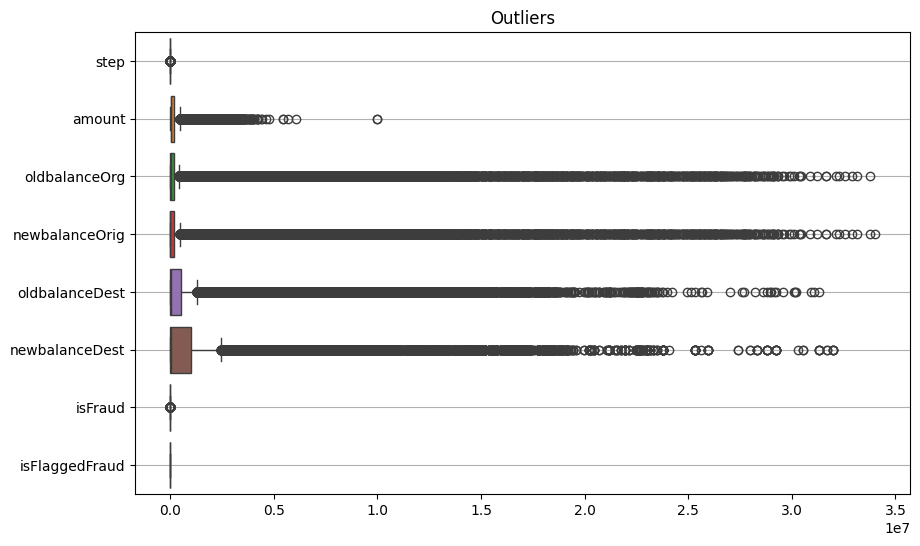

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h') # horizontal
plt.title('Outliers')
plt.grid(axis='y')
plt.show()

In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
data['type'].value_counts()

,count
type,
PAYMENT,28732
CASH_OUT,20389
CASH_IN,13785
TRANSFER,6173
DEBIT,778


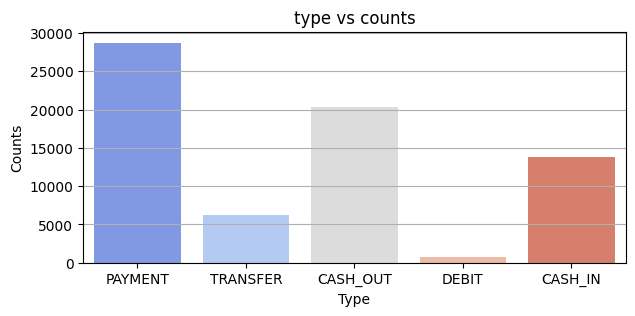

In [ ]:
plt.figure(figsize=(7,3))
plt.title('type vs counts')
sns.countplot(data=data,x='type',palette='coolwarm')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=1)
plt.show()

In [ ]:
data['type'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)

In [ ]:
data['type'].value_counts()

,count
type,
1,28732
0,20389
2,13785
3,6173
4,778


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,3,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data['isFraud'].unique()

array([0., 1.])

In [ ]:
data['isFraud'].value_counts()

,count
isFraud,
0.0,69750
1.0,107


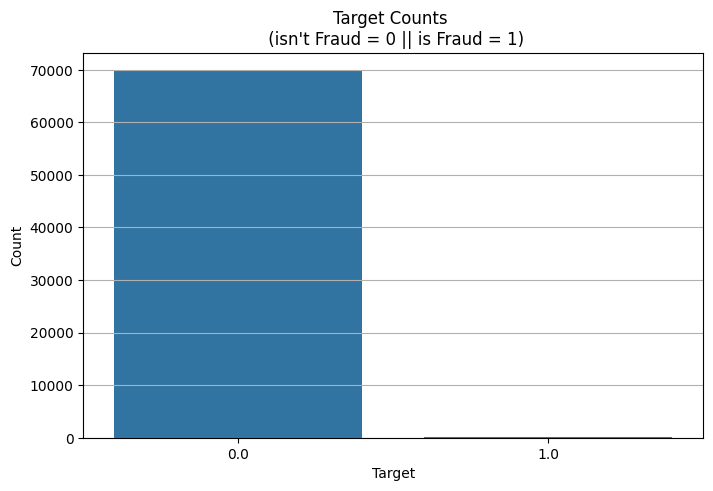

In [ ]:
Target_counts = data['isFraud'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=Target_counts.index, y=Target_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Counts \n (isn\'t Fraud = 0 || is Fraud = 1)')
plt.xticks()
plt.grid(axis='y')
plt.show()

In [ ]:
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [ ]:
data.shape

(69857, 9)

In [ ]:
data.corr()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.107901,0.078138,0.006637,0.006260,0.000887,0.015396,-0.051862,NaN
type,-0.107901,1.000000,0.325134,0.259533,0.266811,0.084799,0.103887,0.015046,NaN
amount,0.078138,0.325134,1.000000,-0.001700,-0.008403,0.268005,0.389110,0.047712,NaN
oldbalanceOrg,0.006637,0.259533,-0.001700,1.000000,0.998970,0.108261,0.075372,-0.004517,NaN
newbalanceOrig,0.006260,0.266811,-0.008403,0.998970,1.000000,0.110350,0.074976,-0.012301,NaN
oldbalanceDest,0.000887,0.084799,0.268005,0.108261,0.110350,1.000000,0.930480,-0.010576,NaN
newbalanceDest,0.015396,0.103887,0.389110,0.075372,0.074976,0.930480,1.000000,-0.007152,NaN
isFraud,-0.051862,0.015046,0.047712,-0.004517,-0.012301,-0.010576,-0.007152,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


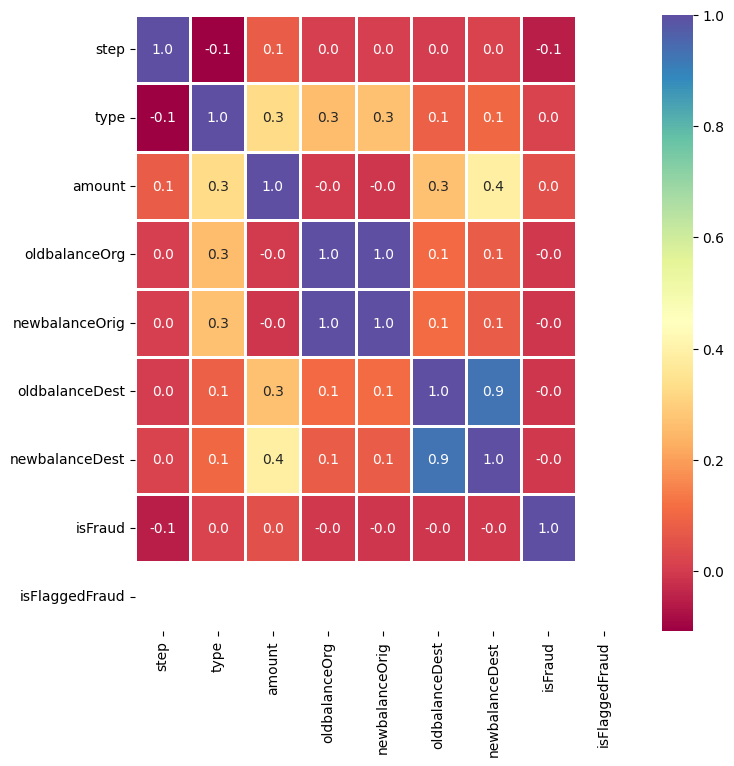

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, linewidths=0.9, fmt=".1f", cmap='Spectral')
plt.show()

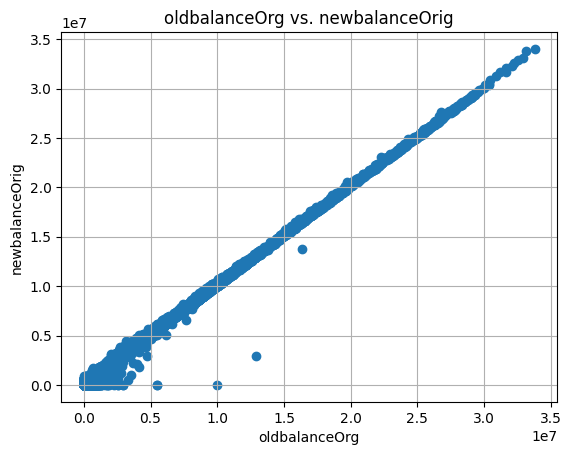

In [ ]:
plt.scatter(data['oldbalanceOrg'], data['newbalanceOrig'], label='Data')
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.title('oldbalanceOrg vs. newbalanceOrig')
plt.grid(True)
plt.show()

In [ ]:
data.drop(['isFlaggedFraud', 'step'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
data.shape

(69857, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69857 entries, 0 to 69856
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            69857 non-null  int64  
 1   amount          69857 non-null  float64
 2   oldbalanceOrg   69857 non-null  float64
 3   newbalanceOrig  69857 non-null  float64
 4   oldbalanceDest  69857 non-null  float64
 5   newbalanceDest  69857 non-null  float64
 6   isFraud         69857 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 4.3 MB


In [ ]:
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,3,181.00,181.0,0.00,0.0,0.0,1.0
3,0,181.00,181.0,0.00,21182.0,0.0,1.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0


In [ ]:
data.tail()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
69852,1,31125.16,0.0,0.0,0.0,0.0,0.0
69853,1,30681.62,0.0,0.0,0.0,0.0,0.0
69854,1,2866.47,0.0,0.0,0.0,0.0,0.0
69855,1,2926.88,0.0,0.0,0.0,0.0,0.0
69856,1,3704.30,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
type,69857.0,1.115608e+00,9.641296e-01,0.00,0.00,1.00,2.00,4.00
amount,69857.0,1.640200e+05,3.313748e+05,0.63,9011.17,44057.64,199132.75,10000000.00
oldbalanceOrg,69857.0,9.043196e+05,2.791634e+06,0.00,0.00,19909.00,172123.00,33797391.55
newbalanceOrig,69857.0,9.203112e+05,2.829900e+06,0.00,0.00,0.00,194027.94,34008736.98
oldbalanceDest,69857.0,8.543644e+05,2.403015e+06,0.00,0.00,14167.00,518614.81,31306920.44
newbalanceDest,69857.0,1.185141e+06,2.871791e+06,0.00,0.00,21130.68,982411.35,31976992.09
isFraud,69857.0,1.531700e-03,3.910724e-02,0.00,0.00,0.00,0.00,1.00


In [ ]:
data.shape

(69857, 7)

In [ ]:
X = data.drop(['isFraud'], axis=1)
print('X shape is : ' , X.shape)
print()

# y Data
y = data['isFraud']
print('y shape is : ' , y.shape)

X shape is :  (69857, 6)

y shape is :  (69857,)


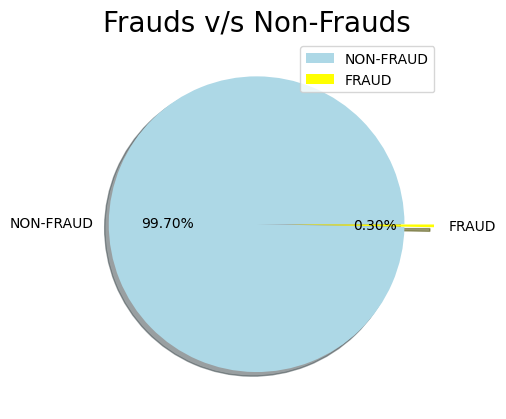

In [ ]:
y.value_counts()

# plotting a pie chart to represent the fraction of the frauds

size = [2762196, 8213]
labels = ['NON-FRAUD', 'FRAUD']
colors = ['lightblue', 'yellow']
explode = [0, 0.2]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow  = True, autopct = '%.2f%%')
plt.title('Frauds v/s Non-Frauds', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

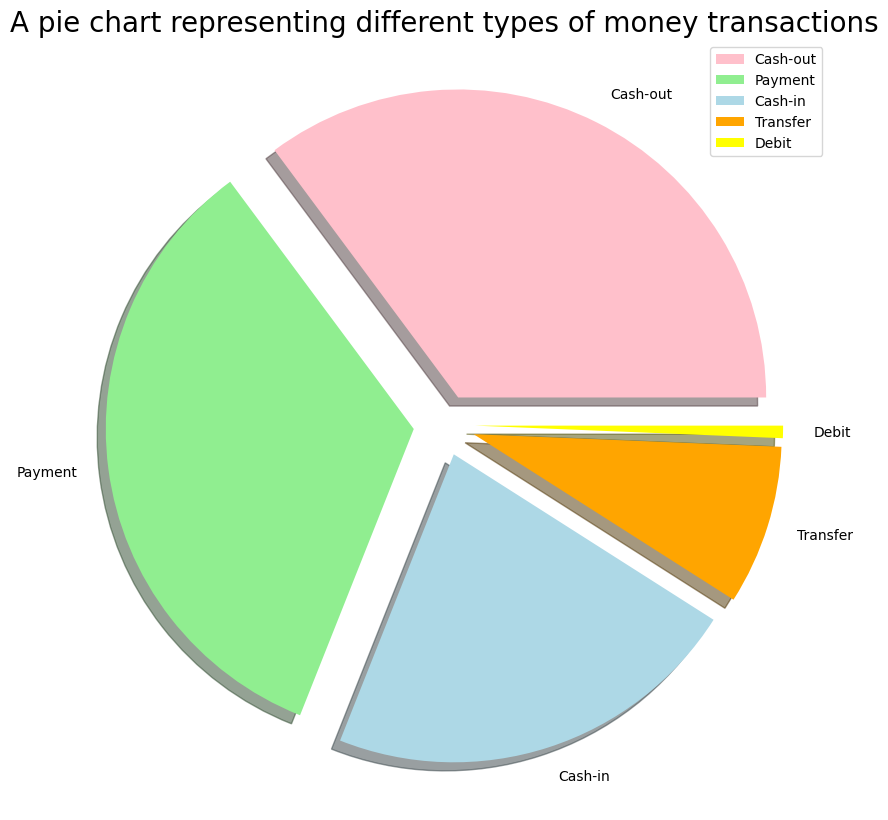

In [ ]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (48899, 6)
X_test shape is  (20958, 6)
y_train shape is  (48899,)
y_test shape is  (20958,)


In [ ]:
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
Model_LR = LogisticRegression()
Model_LR.fit(X_train_scaled, y_train)
y_pred_LR = Model_LR.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_LR.score(X_train_scaled, y_train)
Test_Accuracy = Model_LR.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.85 %
Testing accuracy: 99.86 %


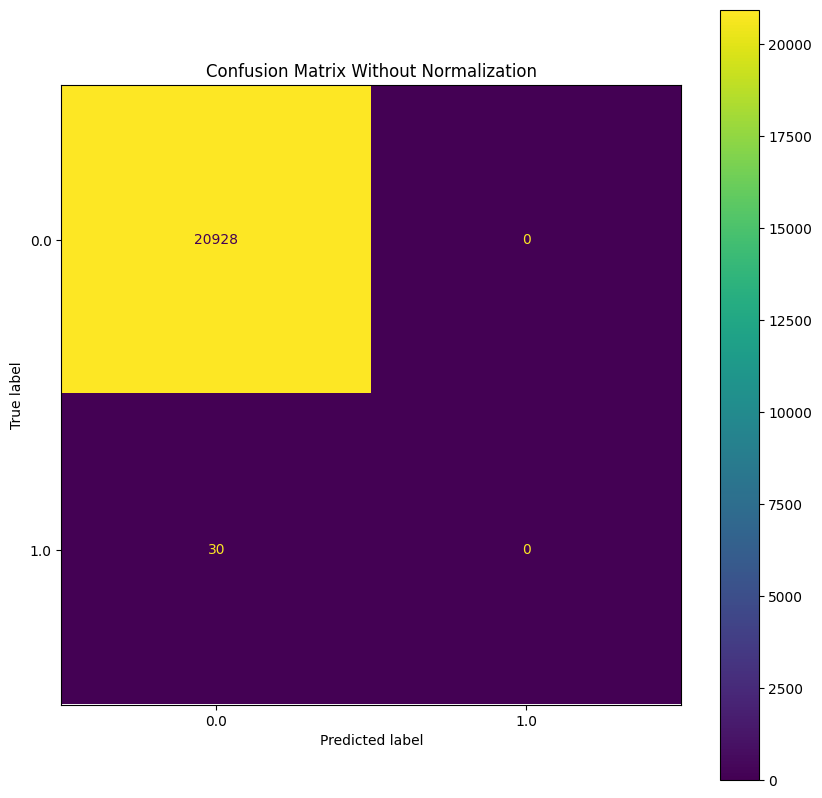

In [ ]:

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_LR)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20928
         1.0       0.00      0.00      0.00        30

    accuracy                           1.00     20958
   macro avg       0.50      0.50      0.50     20958
weighted avg       1.00      1.00      1.00     20958



In [ ]:
Precision_LR = precision_score(y_test, y_pred_LR)
print(f'➤➤➤ Precision Score : {Precision_LR * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_LR = recall_score(y_test, y_pred_LR)
print(f'➤➤➤ Recall Score : {Recall_LR * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_LR = f1_score(y_test, y_pred_LR)
print(f'➤➤➤ F1 Score : {F1_Score_LR * 100 : .2f} %\n')


ROC_AUC_LR = roc_auc_score(y_test, y_pred_LR)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_LR * 100 : .2f} %\n')
Accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f'➤➤➤ Accuracy Score : {Accuracy_LR * 100 : .2f} %\n')


➤➤➤ Precision Score :  0.00 %

➤➤➤ Recall Score :  0.00 %

➤➤➤ F1 Score :  0.00 %

➤➤➤ AUC_ROC :  50.00 %

➤➤➤ Accuracy Score :  99.86 %



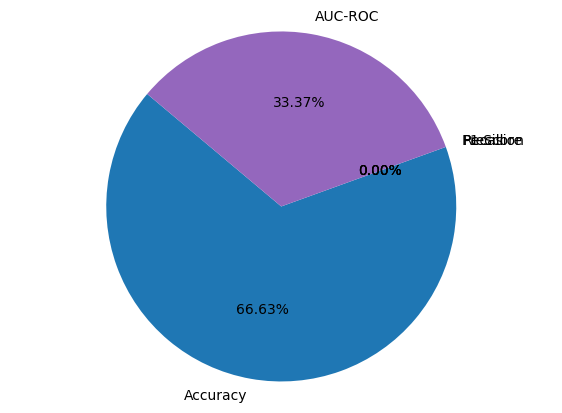

In [ ]:
Scores = [Accuracy_LR, Precision_LR, Recall_LR, F1_Score_LR, ROC_AUC_LR]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
Model_DT = DecisionTreeClassifier()
Model_DT.fit(X_train_scaled, y_train)
y_pred_DT = Model_DT.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_DT.score(X_train_scaled, y_train)
Test_Accuracy = Model_DT.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 100.00 %
Testing accuracy: 99.90 %


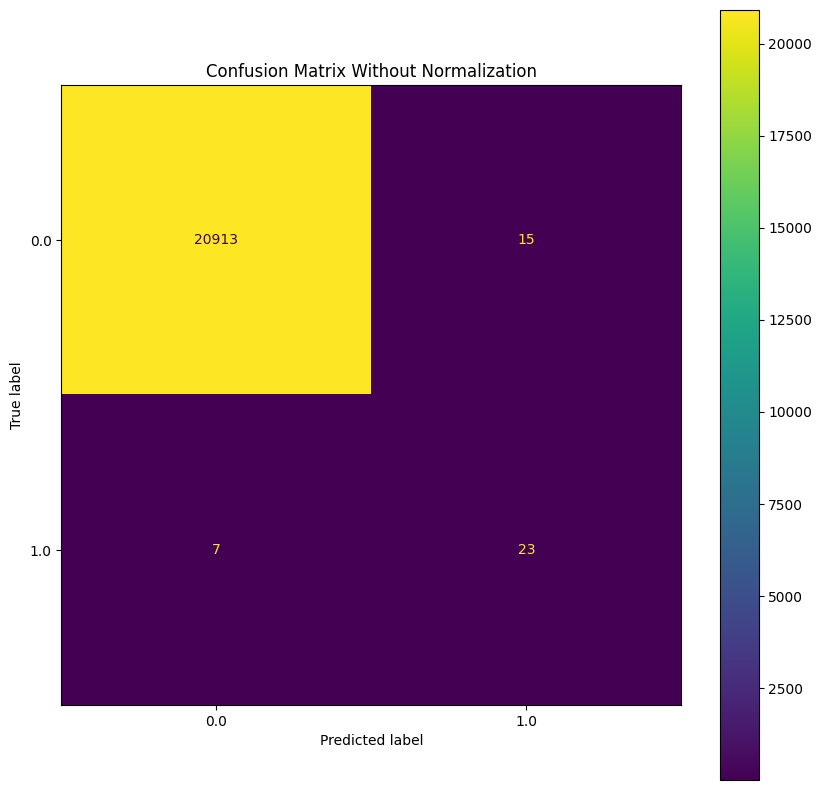

In [ ]:
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_DT)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_DT))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20928
         1.0       0.61      0.77      0.68        30

    accuracy                           1.00     20958
   macro avg       0.80      0.88      0.84     20958
weighted avg       1.00      1.00      1.00     20958



In [ ]:
Accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f'➤➤➤ Accuracy Score : {Accuracy_DT * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_DT = precision_score(y_test, y_pred_DT)
print(f'➤➤➤ Precision Score : {Precision_DT * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_DT = recall_score(y_test, y_pred_DT)
print(f'➤➤➤ Recall Score : {Recall_DT * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_DT = f1_score(y_test, y_pred_DT)
print(f'➤➤➤ F1 Score : {F1_Score_DT * 100 : .2f} %\n')

ROC_AUC_DT = roc_auc_score(y_test, y_pred_DT)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_DT * 100 : .2f} %\n')



➤➤➤ Accuracy Score :  99.90 %

➤➤➤ Precision Score :  60.53 %

➤➤➤ Recall Score :  76.67 %

➤➤➤ F1 Score :  67.65 %

➤➤➤ AUC_ROC :  88.30 %



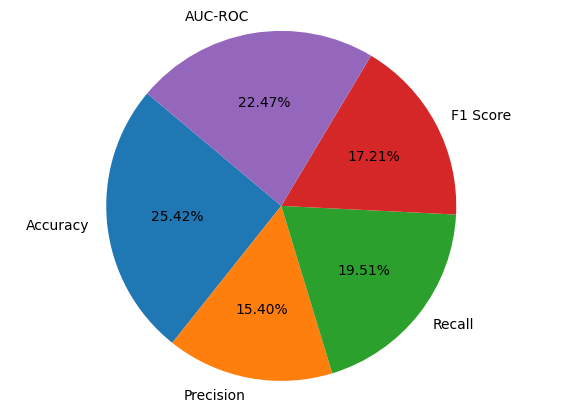

In [ ]:
Scores = [Accuracy_DT, Precision_DT, Recall_DT, F1_Score_DT, ROC_AUC_DT]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
Model_NB = GaussianNB()
Model_NB.fit(X_train_scaled, y_train)
y_pred_NB = Model_NB.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_NB.score(X_train_scaled, y_train)
Test_Accuracy = Model_NB.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 97.97 %
Testing accuracy: 98.07 %


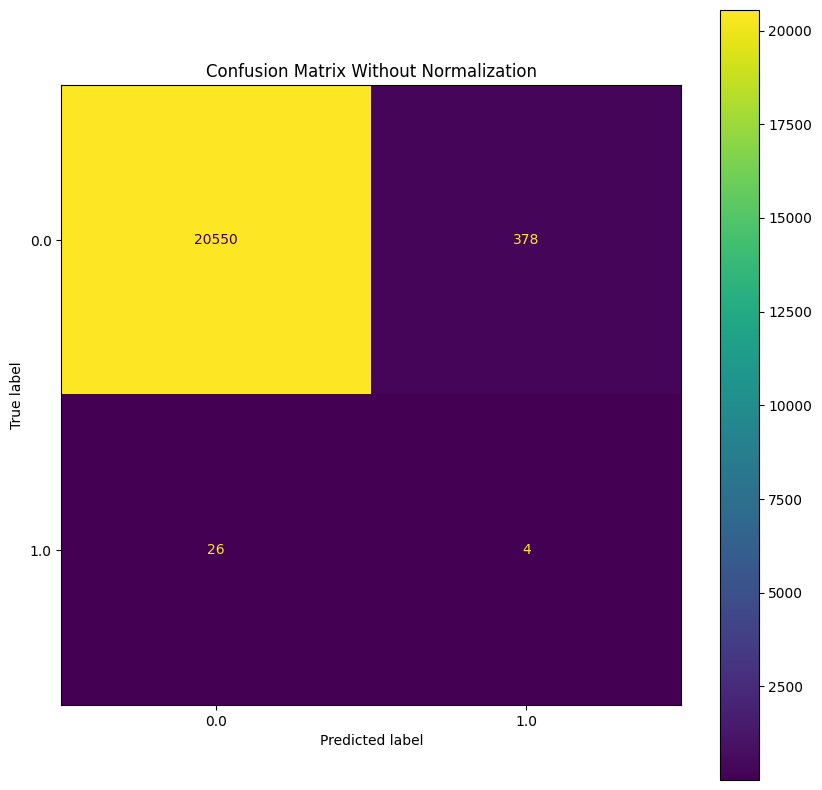

In [ ]:
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_NB)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     20928
         1.0       0.01      0.13      0.02        30

    accuracy                           0.98     20958
   macro avg       0.50      0.56      0.50     20958
weighted avg       1.00      0.98      0.99     20958



In [ ]:
Accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f'➤➤➤ Accuracy Score : {Accuracy_NB * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_NB = precision_score(y_test, y_pred_NB)
print(f'➤➤➤ Precision Score : {Precision_NB * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_NB = recall_score(y_test, y_pred_NB)
print(f'➤➤➤ Recall Score : {Recall_NB * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_NB = f1_score(y_test, y_pred_NB)
print(f'➤➤➤ F1 Score : {F1_Score_NB * 100 : .2f} %\n')


ROC_AUC_NB = roc_auc_score(y_test, y_pred_NB)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_NB * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  98.07 %

➤➤➤ Precision Score :  1.05 %

➤➤➤ Recall Score :  13.33 %

➤➤➤ F1 Score :  1.94 %

➤➤➤ AUC_ROC :  55.76 %



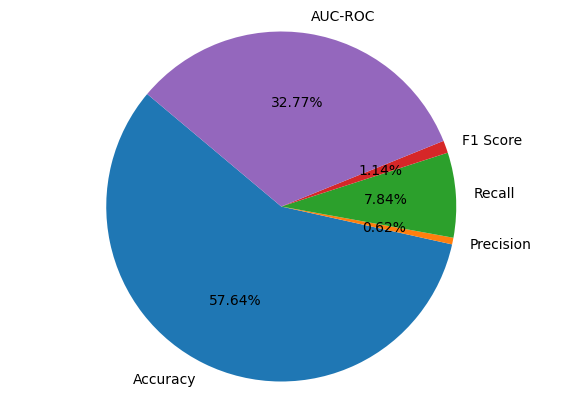

In [ ]:
Scores = [Accuracy_NB, Precision_NB, Recall_NB, F1_Score_NB, ROC_AUC_NB]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
evaluation = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree', 'Naive Bayes'],
                           'Accuracy': [(Accuracy_LR*100), (Accuracy_DT*100), (Accuracy_NB*100)]})

evaluation

,Model,Accuracy
0,Logistic Regression,99.856857
1,Decision Tree,99.895028
2,Naive Bayes,98.072335
